# 演習４　KLTの基底の計算

##課題

配布資料６のモデル化された自己共分散行列$C_{\rm model}$を生成し（$8\times8$行列．$\rho$はパラメータとする），このときのKLTの基底ベクトルを求め可視化せよ．また，$\rho$を変化させたときに基底がどのように変化するかを観察せよ．余裕があれば，得られたKLTの基底を1次元8点DCTの基底と比較せよ．


##ヒント
* 固有ベクトルの計算には`np.linalg.eig`を使用するとよい．
* 1次元8点DCTの基底は例えば以下のようにすれば可視化できる．`plt.imshow(dct(np.eye(8,8)))`
* Toeplitz行列は`scipy.linalg.topelitz`を使うと簡単に作れる（使わなくてもできる）．

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.linalg import toeplitz,eig
from scipy.fft import dct

def make_cmodel(rho):
    cmodel=np.mat([[rho**abs(i-j) for j in range(8)] for i in range(8)])
    return cmodel

## Example

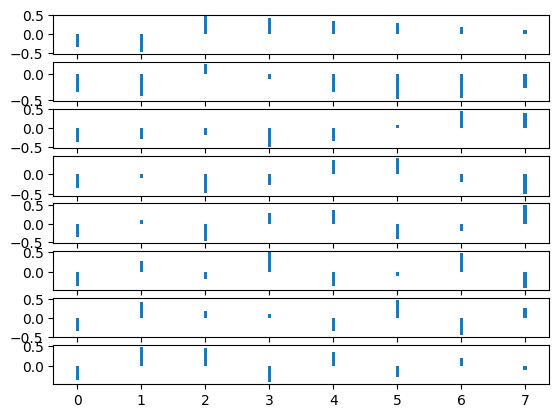

In [3]:
rho=0.99
cmodel=make_cmodel(rho)
basis,basis_vectors=eig(cmodel)
fig,ax=plt.subplots(8)
for i in range(8):
        ax[i].bar(list(range(8)),basis_vectors[i],width=0.05)

## Comparison

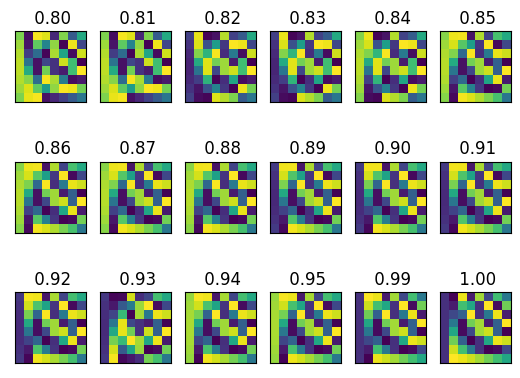

In [24]:
rhos=list(np.arange(0.8,0.95,0.01))+[0.95,0.99,0.999]
n=6
fig,ax=plt.subplots((len(rhos)-1)//n+1,n)
for i in range(len(rhos)):
    cmodel=make_cmodel(rhos[i])
    basis_vectors=sorted(list(zip(*list(map(lambda x:x.tolist(),np.linalg.eig(cmodel))))),key=lambda x:x[0])
    basis_vectors=list(map(lambda x:x[1],basis_vectors))
    ax[i//n][i%n].imshow(basis_vectors)
    ax[i//n][i%n].set_title(f"{rhos[i]: .2f}")
    ax[i//n][i%n].set_xticks([])
    ax[i//n][i%n].set_yticks([])